In [194]:
import os
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [195]:
dataset_folder = "Final_Data_V2"
categories = os.listdir(dataset_folder)
num_classes = len(categories)
X_data = []
y_data = []

In [196]:
for i, category in enumerate(categories):
    folder_path = os.path.join(dataset_folder, category)
    images = []
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))
        if img is not None:
            img = img.resize((100, 100))
            if img.mode == 'RGBA':
                img = img.convert('RGB')
            img_array = np.array(img)
            if len(img_array.shape) == 3 and img_array.shape[2] == 3:
                images.append(img_array)
    labels = [i] * len(images)
    X_data.extend(images)
    y_data.extend(labels)

In [197]:
X_data = np.array(X_data)
y_data = np.array(y_data)
X_data = X_data.astype('float32') / 255.0
y_data = to_categorical(y_data, num_classes)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=100)

In [198]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

In [199]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [200]:
batch_size = 3
epochs = 30

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size, subset='training')
validation_generator = datagen.flow(X_train, y_train, batch_size=batch_size, subset='validation')

In [201]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=epochs, validation_data=validation_generator)

Epoch 1/30
1144/1144 [==============================] - 14s 12ms/step - loss: 2.4544 - accuracy: 0.2005 - val_loss: 2.3920 - val_accuracy: 0.2462
Epoch 2/30
1144/1144 [==============================] - 14s 12ms/step - loss: 2.2874 - accuracy: 0.2686 - val_loss: 2.2089 - val_accuracy: 0.2835
Epoch 3/30
1144/1144 [==============================] - 13s 12ms/step - loss: 2.1501 - accuracy: 0.3237 - val_loss: 2.0744 - val_accuracy: 0.3652
Epoch 4/30
1144/1144 [==============================] - 13s 11ms/step - loss: 2.0293 - accuracy: 0.3680 - val_loss: 2.0672 - val_accuracy: 0.3524
Epoch 5/30
1144/1144 [==============================] - 13s 11ms/step - loss: 1.9285 - accuracy: 0.4062 - val_loss: 2.0563 - val_accuracy: 0.3722
Epoch 6/30
1144/1144 [==============================] - 13s 11ms/step - loss: 1.8903 - accuracy: 0.4167 - val_loss: 1.8926 - val_accuracy: 0.4306
Epoch 7/30
1144/1144 [==============================] - 13s 12ms/step - loss: 1.8323 - accuracy: 0.4307 - val_loss: 1.8798 -

In [202]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

34/34 [==============================] - 1s 29ms/step - loss: 1.5509 - accuracy: 0.5461
Test Loss: 1.550933837890625
Test Accuracy: 0.5461323261260986


In [210]:
model.save("ClothingModel.h5")

In [211]:
loaded_model = load_model("ClothingModel.h5")

In [212]:
img_path = 'test2.jpg'
img = Image.open(img_path)
img = img.resize((100, 100))  
img_array = np.array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
print(categories[predicted_class])

1/1 [==============================] - 0s 48ms/step
Tshirt


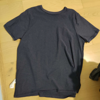

In [213]:
img

In [209]:
import tensorflow as tf

model = tf.keras.models.load_model('ClothingModel.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('ClothingModel.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Vucko\AppData\Local\Temp\tmp64ziw3e0\assets


INFO:tensorflow:Assets written to: C:\Users\Vucko\AppData\Local\Temp\tmp64ziw3e0\assets


In [214]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

print("Confusion Matrix:")
print(confusion_mtx)

34/34 [==============================] - 1s 27ms/step - loss: 1.5371 - accuracy: 0.5815
Test Loss: 1.5371321439743042
Test Accuracy: 0.5815470814704895
34/34 [==============================] - 1s 24ms/step
Confusion Matrix:
[[  3   0   0   0   0   4   9   0   0   5   0   0   0   0   0]
 [  0   0   0   0   0   2   2   2   0   8   3   0   0  19   1]
 [  0   0  12   0   0   1   0   1   0   0   0   0   0   3   0]
 [  0   0   0  28   0  13   5   2   0   2  11  16   0  15   0]
 [  0   0   0   0   2   7   8   1   0   5   1   2   0   6   0]
 [  0   0   1   0   1 101  16   3   0  12   1   0   0  39   0]
 [  1   0   0   0   2  11  47   1   0   7   2   0   0   9   0]
 [  0   0   0   0   0   1   2 116   0   2   3   0   0   4   0]
 [  0   0   0   0   1   3   0   1   0   0   1   1   1  38   0]
 [  0   0   0   1   0  18   9   0   0  41   0   0   0  14   0]
 [  0   0   0   5   0   1   0   1   0   1  68   0   0   4   0]
 [  0   0   0   2   0   4   3   1   0   7   0   7   0  14   2]
 [  0   0   0   0   